In [156]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

def relu(a, derivative=False):
    if derivative:
        return (a > 0) * 1
    f_a = np.maximum(0, a)
    return f_a  

def softmax(y):
    e_y = np.exp(y - np.max(y, axis=0))
    return e_y / np.sum(e_y, axis=0)


def sigmoid(a, derivative=False):
    f_a = (1 / (1 + np.exp(-a)))
    if derivative:
        return np.multiply(f_a, (1 - f_a))
    return f_a

class Perceptron:
    def __init__(self, previous_layer_size, activation_function=relu):
        self.theta = 0
        self.w = np.random.randn(previous_layer_size)
        self.activation = activation_function

    def y(self, inputs):
        return self.activation(np.dot(inputs, self.w) + self.theta)


In [157]:
# loss function
def compute_loss(self, y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# update NeuralNetwork class
class NeuralNetwork:
    def __init__(self, hidden_layer_activation=relu, output_layer_activation=sigmoid):
        self.input_layer = [Perceptron(2) for _ in range(2)]
        self.hidden_layer = [Perceptron(2, activation_function=hidden_layer_activation) for _ in range(4)]
        self.output_layer = [Perceptron(4, activation_function=output_layer_activation)]

    # ... rest of your code

    def forward(self, inputs):
        hidden_output = self.forward_hidden_layer(inputs)
        output_output = self.forward_output_layer(hidden_output)
        return output_output

    def forward_hidden_layer(self, inputs):
        return np.array([perceptron.y(inputs) for perceptron in self.hidden_layer])
    
    def forward_output_layer(self, inputs):
        return self.output_layer[0].y(inputs)
    
    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            hidden_output = self.forward_hidden_layer(X[i])
            output_output = self.forward_output_layer(hidden_output)
            y_pred.append(round(output_output))
        return np.array(y_pred)
    
    def train(self, X, y, epochs, learning_rate):
        loss_history = []
        accuracy_history = []
        for epoch in range(epochs):
            for i in range(len(X)):
                # forward propagation
                hidden_output = self.forward_hidden_layer(X[i])
                output_output = self.forward_output_layer(hidden_output)

                # backward propagation
                output_error = y[i] - output_output
                output_delta = 2 * output_error * self.output_layer[0].activation(output_output, derivative=True)

                hidden_error = np.dot(output_delta, self.output_layer[0].w)
                hidden_delta = hidden_error * self.hidden_layer[0].activation(hidden_output, derivative=True)

                # update weights and biases (theta)
                self.output_layer[0].w += learning_rate * output_delta * hidden_output
                self.output_layer[0].theta += learning_rate * output_error

                for j, p in enumerate(self.hidden_layer):
                    p.w += learning_rate * hidden_delta[j] * X[i]
                    p.theta += learning_rate * hidden_delta[j]
            
            # calculate loss and accuracy at the end of each epoch
            loss = self.compute_loss(y, self.predict(X))
            accuracy = np.mean(self.predict(X) == y)
            loss_history.append(loss)
            accuracy_history.append(accuracy)
            
            # print loss and accuracy for every epoch
            #print('Epoch: {}, Loss: {}, Accuracy: {}'.format(epoch, loss, accuracy))
        
        return loss_history, accuracy_history

    def compute_loss(self, y, y_pred):
        return np.mean((y - y_pred)**2)

    #def compute_loss(self, y, y_pred):
    #    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [158]:
# Creating data

def get_data(n: int):
    X_data = np.random.rand(n, 2) * 20 - 10
    y_data = np.array([(0 if x.prod() < 0 else 1) for x in X_data])
    return X_data, y_data



In [159]:
# create a new network
def test_networks(X_train, y_train, X_test, y_test, learning_rate=0.1):
    activations = [('relu', relu), ('sigmoid', sigmoid)]
    networks = []
    for hidden_layer_activation in activations:
        network = NeuralNetwork(hidden_layer_activation=hidden_layer_activation[1], output_layer_activation=sigmoid)
        print(f"Neural network: hidden layer {hidden_layer_activation[0]} learning start")
        
        
        loss_history, accuracy_history = network.train(X_train, y_train, epochs=100, learning_rate=learning_rate)
        
        loss = network.compute_loss(y_test, network.predict(X_test))
        accuracy = np.mean(network.predict(X_test) == y_test)
        print(f"Test data: loss: {loss},  accuracy {accuracy}")
        
        networks.append(
            {
                "network": NeuralNetwork(hidden_layer_activation=hidden_layer_activation[1], output_layer_activation=sigmoid),
                "hidden": hidden_layer_activation[0],
                "output": "sigmoid",
                "loss": loss_history,
                "accuracy": accuracy_history
            }
        )
            
    plt.figure(figsize=(12,6))
            
    for i, network in enumerate(networks):
        plt.subplot(1,2,i+1)
        xs = range(len(network['loss']))
        plt.title(f"Hidden layer: {network['hidden']}, output: sigmoid, lr:{learning_rate}")
        plt.ylim(ymin=0, ymax=1)
        plt.plot(xs, network['loss'], label='loss')
        plt.plot(xs, network['accuracy'], label="accuracy")
        plt.legend()
    plt.show()


In [160]:
def l1(x):
    return (x / np.sum(np.abs(x)))

def l2(x):
    return (x / np.sqrt(np.sum(x*x)))

X_train, y_train = get_data(1000)
X_train_l1 = np.array([l1(x) for x in X_train])
X_train_l2 = np.array([l2(x) for x in X_train])

X_test, y_test = get_data(100)
X_test_l1 = np.array([l1(x) for x in X_test])
X_test_l2 = np.array([l2(x) for x in X_test])



Neural network: hidden layer relu learning start
Test data: loss: 0.09,  accuracy 0.91
Neural network: hidden layer sigmoid learning start
Test data: loss: 0.46,  accuracy 0.54


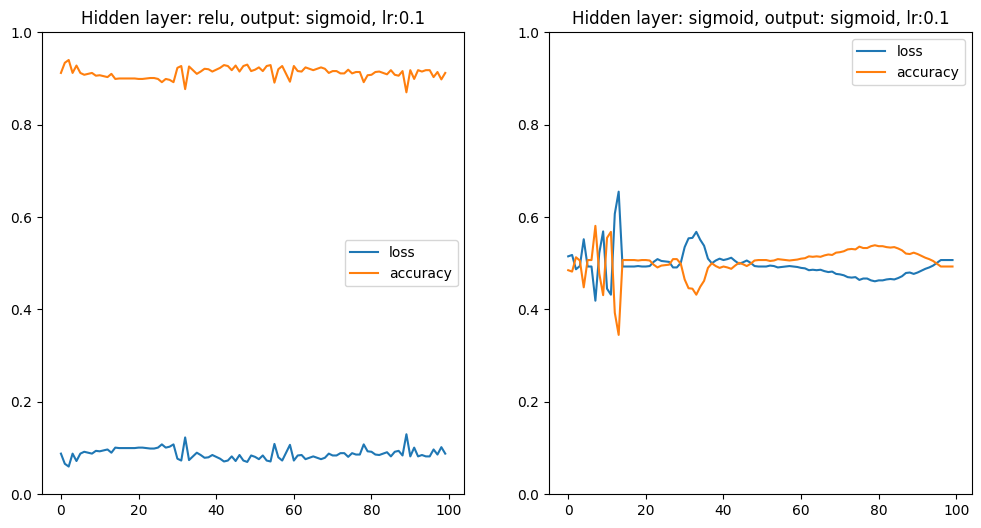

In [161]:
test_networks(X_train, y_train, X_test, y_test)

Neural network: hidden layer relu learning start
Test data: loss: 0.01,  accuracy 0.99
Neural network: hidden layer sigmoid learning start
Test data: loss: 0.11,  accuracy 0.89


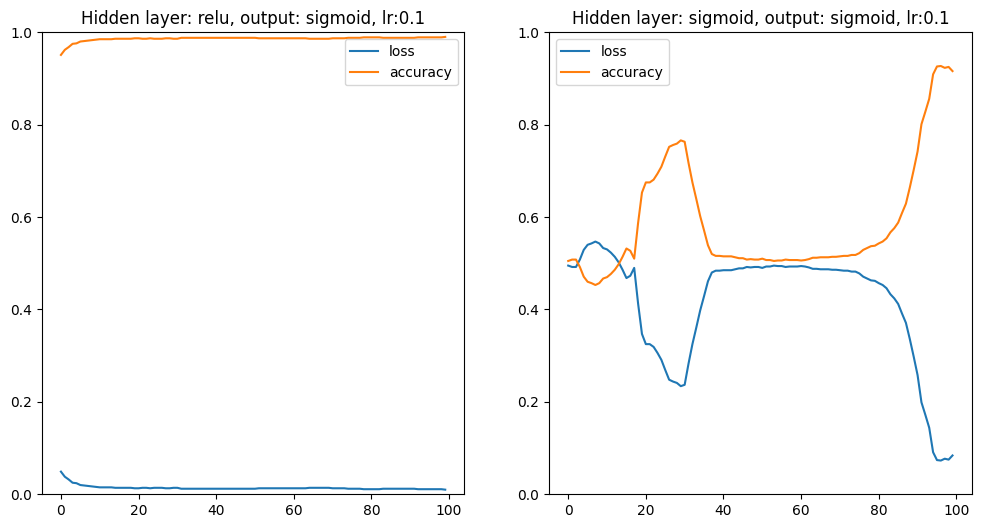

In [162]:
test_networks(X_train_l1, y_train, X_test_l1, y_test)

Neural network: hidden layer relu learning start
Test data: loss: 0.01,  accuracy 0.99
Neural network: hidden layer sigmoid learning start
Test data: loss: 0.35,  accuracy 0.65


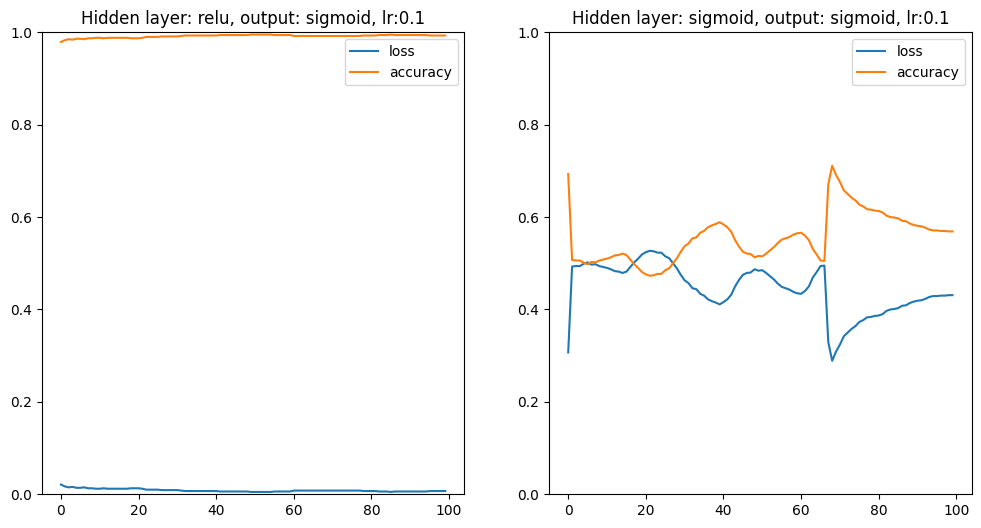

In [163]:
test_networks(X_train_l2, y_train, X_test_l2, y_test)

Neural network: hidden layer relu learning start
Test data: loss: 0.07,  accuracy 0.93
Neural network: hidden layer sigmoid learning start
Test data: loss: 0.48,  accuracy 0.52


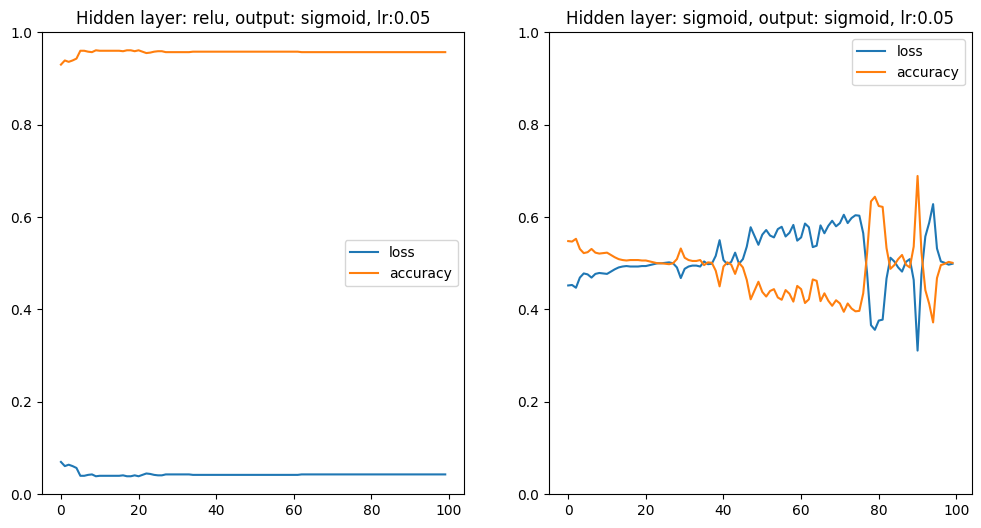

In [166]:
test_networks(X_train, y_train, X_test, y_test, learning_rate=0.05)

Neural network: hidden layer relu learning start
Test data: loss: 0.01,  accuracy 0.99
Neural network: hidden layer sigmoid learning start
Test data: loss: 0.27,  accuracy 0.73


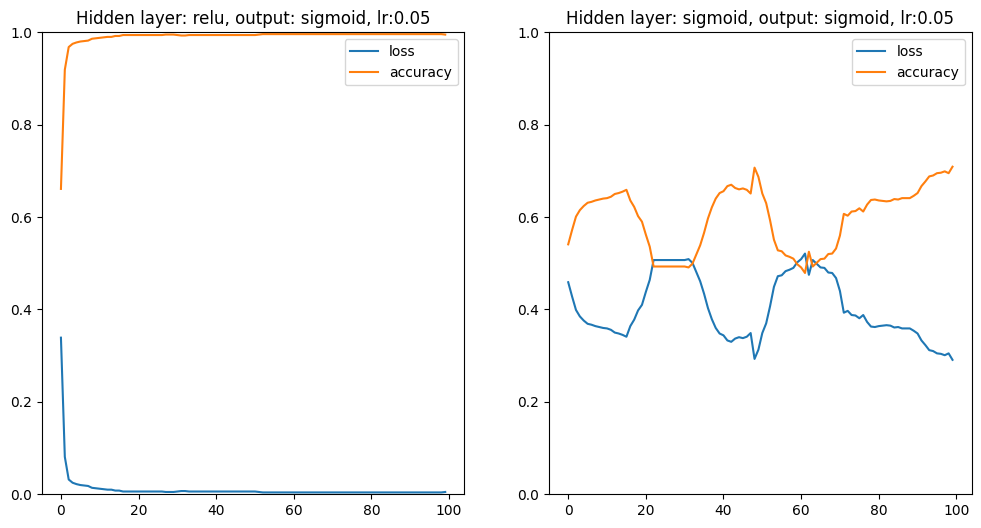

In [167]:
test_networks(X_train_l1, y_train, X_test_l1, y_test, learning_rate=0.05)

Neural network: hidden layer relu learning start
Test data: loss: 0.01,  accuracy 0.99
Neural network: hidden layer sigmoid learning start
Test data: loss: 0.21,  accuracy 0.79


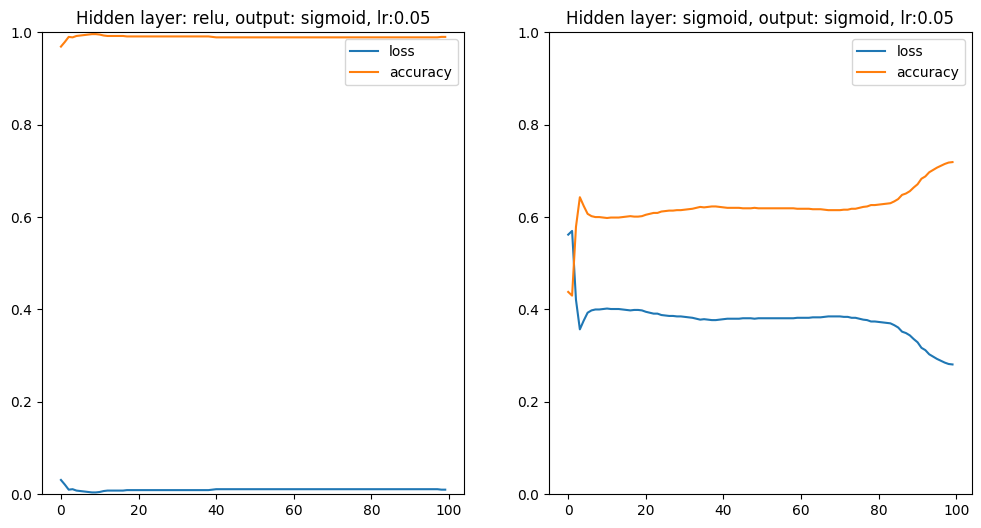

In [168]:
test_networks(X_train_l2, y_train, X_test_l2, y_test, learning_rate=0.05)